# Cell cycle model CCCMV001

**Cell cycle model (variable mass) for mammalians ver. 001**

Packages

In [1]:
using DifferentialEquations
using PyDSTool, PyCall
using PyPlot
using JLD

INFO: Recompiling stale cache file /home/shigoto/.julia/lib/v0.6/DifferentialEquations.ji for module DifferentialEquations.
INFO: Recompiling stale cache file /home/shigoto/.julia/lib/v0.6/PyDSTool.ji for module PyDSTool.
INFO: Recompiling stale cache file /home/shigoto/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


LoadError: [91mArgumentError: Module JLD not found in current path.
Run `Pkg.add("JLD")` to install the JLD package.[39m

In [2]:
include("custom_functions.jl");
include("plot_functions.jl");

In [3]:
@load "CCCMV001_data.jld"

LoadError: [91mUndefVarError: @load not defined[39m

### Model system of ODE's

Model function

In [4]:
f = @ode_def_bare CCMMV001 begin
    ## System of ODE (vector field)
    dMPF     = k_m0*Mass - (k_m2 + k_m2a*Wee1)*MPF + (k_m1 + k_m1a*Cdc25_P)*MPF_P - (k_m3 + k_m3a*APC_A)*MPF
    dMPF_P   = (k_m2 + k_m2a*Wee1)*MPF - (k_m1 + k_m1a*Cdc25_P)*MPF_P - (k_m3 + k_m3a*APC_A)*MPF_P
    dWee1    = V_w1*(Wee1_T - Wee1)/(J_w1 + Wee1_T - Wee1) - k_w2*(MPF + MPF_P*α)*Wee1/(J_w2 + Wee1)
    dCdc25_P = k_c1*(MPF + MPF_P*α)*(Cdc25_T - Cdc25_P)/(J_c1 + Cdc25_T - Cdc25_P) - V_c2*Cdc25_P/(J_c2 + Cdc25_P)
    dIE_A    = k_i1*(MPF + MPF_P*α)*(IE_T - IE_A)/(J_i1 + IE_T - IE_A) - V_i2*IE_A/(J_i2 + IE_A)
    dAPC_A   = k_a1*IE_A*(APC_T - APC_A)/(J_a1 + APC_T - APC_A) - V_a2*APC_A/(J_a2 + APC_A)
    dMass    = μ*Mass*(1 - Mass/K_Mass)
end k_m0=>0.2 k_m1=0.4 k_m1a=20.0 k_m2=0.4 k_m2a=50.0 k_m3=0.2 k_m3a=6.35 V_w1=1.0 k_w2=5.3 J_w1=0.01 J_w2=0.01 k_c1=8.5 V_c2=>1.4 k_c2a=2.2 J_c1=0.01 J_c2=0.01 k_i1=1.7 V_i2=0.4 J_i1=0.001 J_i2=0.001 k_a1=6.8 V_a2=1.7 J_a1=0.001 J_a2=0.001 α=0.05 μ=0.07 K_Mass=2.7 Wee1_T=1.0 Cdc25_T=1.0 IE_T=1.0 APC_T=1.0 Chk2_T=1.0 theta_M=>0.2

(::CCMMV001) (generic function with 8 methods)

Cell division events

In [5]:
function division(t,u,integrator)
    ## Parameters
    ## Set of condition: MPF crosses threshold from positive to negative
    u[1] - f.theta_M
end # ModelCond

function division_event!(integrator)
    # Divide mass in two
    integrator.u[7] = integrator.u[7]/2
end # ModelEvent!

cb = ContinuousCallback(division, nothing, division_event!, save_positions=(true,false))

DiffEqBase.ContinuousCallback{#division,Void,#division_event!,DiffEqBase.#INITIALIZE_DEFAULT,Float64,Int64,Void}(division, nothing, division_event!, DiffEqBase.INITIALIZE_DEFAULT, nothing, true, 10, (true, false), 1.0e-9, 0)

### Important solutions

**Cell cycle**. Initial conditions and parameter options for normal cell cycle.

In [6]:
f.V_c2 = 1.4
u0 = [0.039,      # MPF
      1.660,      # MPF_P
      0.982,      # Wee1
      0.027,      # Cdc25_P
      0.001,      # IE_A
      0.000,      # APC_A
      1.938]      # Mass
tspan = (0.0, 28.0)
dtmax = 0.001
alg = Rosenbrock23()
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, alg, callback=cb; (:dtmax, dtmax))
sol.errors

In [7]:
sol

retcode: Success
Interpolation: specialized 2nd order "free" stiffness-aware interpolation
t: 28009-element Array{Float64,1}:
  0.0        
  4.81181e-5 
  0.000308649
  0.000581942
  0.0012293  
  0.00203227 
  0.00303227 
  0.00403227 
  0.00503227 
  0.00603227 
  0.00703227 
  0.00803227 
  0.00903227 
  ⋮          
 27.9898     
 27.9908     
 27.9918     
 27.9928     
 27.9938     
 27.9948     
 27.9958     
 27.9968     
 27.9978     
 27.9988     
 27.9998     
 28.0        
u: 28009-element Array{Array{Float64,1},1}:
 [0.039, 1.66, 0.982, 0.027, 0.001, 0.0, 1.938]                            
 [0.0390005, 1.66, 0.982, 0.0270002, 0.00100035, 3.14003e-7, 1.938]        
 [0.039003, 1.66001, 0.982001, 0.0270015, 0.00100219, 1.64258e-6, 1.93801] 
 [0.0390056, 1.66002, 0.982002, 0.0270028, 0.00100407, 2.52992e-6, 1.93802]
 [0.0390117, 1.66005, 0.982003, 0.027006, 0.00100834, 3.56418e-6, 1.93805] 
 [0.0390191, 1.66008, 0.982005, 0.0270099, 0.00101327, 3.94584e-6, 1.93808]
 [0.039028

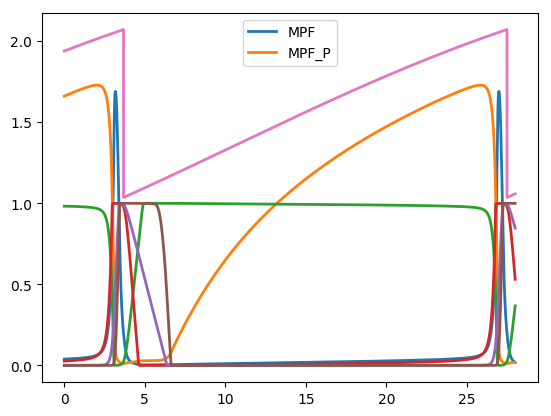

PyObject <matplotlib.legend.Legend object at 0x7f6f04e7afd0>

In [7]:
plot(sol.t, sol.u, lw=2)
legend(labels=["MPF","MPF_P"])

**Steady state**. Changing $V_{c2}$ to 4.0. This moves the dynamics to checkpoint, i.e., steady state solution.

In [8]:
f.V_c2 = 4.0
u0 = [0.042,      # MPF
      2.656,      # MPF_P
      0.886,      # Wee1
      0.005,      # Cdc25_P
      0.002,      # IE_A
      0.000,      # APC_A
      2.699]      # Mass
tspan=(0.0, 20.0)
prob = ODEProblem(f, u0, tspan)
dtmax = 0.1
sol = solve(prob, alg, callback=cb; (:dtmax, dtmax))
sol.errors

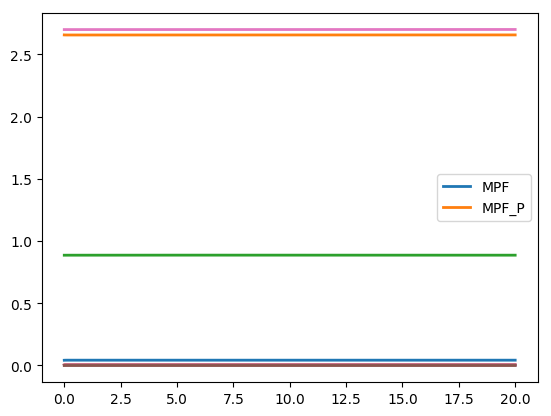

PyObject <matplotlib.legend.Legend object at 0x7f6ed1c56dd0>

In [9]:
plot(sol.t, sol.u, lw=2)
legend(labels=["MPF","MPF_P"])

Value of solution at the stady state for $V_{c2}$

In [10]:
sol.u[end]

7-element Array{Float64,1}:
 0.0425949 
 2.65603   
 0.886232  
 0.00584799
 0.00291675
 1.17928e-5
 2.69975   

### Find limit cycle

Functions

In [11]:
function find_cell_cycle(f, u0, tspan; alg=Rosenbrock23(), kwargs...)
    function division_stop!(integrator)
        integrator.u[7] = integrator.u[7]/2
        terminate!(integrator)
    end
    cb_start = ContinuousCallback(division, nothing, division_stop!)
    # Integrate until first division
    # NOTE: assert tspan is larger than needed
    prob = ODEProblem(f, u0, tspan)
    sol = solve(prob, alg, callback=cb_start; kwargs...)
    # One full cycle
    u0_start = sol.u[end]
    prob = ODEProblem(f, u0_start, tspan)
    sol = solve(prob, alg, callback=cb_start; kwargs...)
    # Done
    sol
end #function find_cell_cycle

find_cell_cycle (generic function with 1 method)

A full limit cycle starts and finishes on cell division (when MPF concentration drops bellow 0.2).

In [12]:
f.V_c2 = 1.6
u0 = [0.039,      # MPF
      1.660,      # MPF_P
      0.982,      # Wee1
      0.027,      # Cdc25_P
      0.001,      # IE_A
      0.000,      # APC_A
      1.938]      # Mass
tspan = (0.0, 28.0)
dtmax = 0.001
sol = find_cell_cycle(f, u0, tspan; (:dtmax, dtmax))
cycle = sol
sol.errors

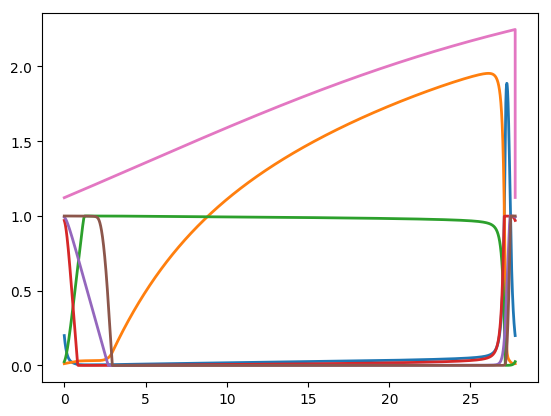

7-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6ecf5d5290>
 PyObject <matplotlib.lines.Line2D object at 0x7f6ecf5d5490>
 PyObject <matplotlib.lines.Line2D object at 0x7f6ecf5d55d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f6ecf5d5710>
 PyObject <matplotlib.lines.Line2D object at 0x7f6ecf5d5850>
 PyObject <matplotlib.lines.Line2D object at 0x7f6ecf5d5990>
 PyObject <matplotlib.lines.Line2D object at 0x7f6ecf5d5ad0>

In [13]:
plot(sol.t, sol.u, lw=2)

Period

In [14]:
sol.t[end]-sol.t[1]

27.74965762139642

## Bifurcation

**Stable node and saddle point (saddle-node branch of the SNIC)**

In [15]:
u0 = [0.0425188,
      2.65499,
      0.887348,
      0.00584123,
      0.00290841,
      1.17587e-5,
      2.69903]
tspan = [0, 40]
dsargs = build_ode(f,u0,tspan)
dsargs[:pdomain] = Dict("V_c2"=>[0, 6])
ode = ds[:Generator][:Vode_ODEsystem](dsargs)
ode[:set](pars = Dict("V_c2"=>4.0))
PC = ds[:ContClass](ode)

PyObject ContClass of model CCMMV001

In [16]:
name1 = "EQ1"
PCargs = ds[:args](name = name1)
PCargs[:type] = "EP-C"
PCargs[:freepars] = ["V_c2"]
PCargs[:MaxNumPoints] = 100
PCargs[:MaxStepSize] = 1e-0
PCargs[:MinStepSize] = 1e-5
PCargs[:StepSize] = 1e-2
PCargs[:LocBifPoints] = "all"
PCargs[:SaveEigen] = true
PCargs[:verbosity] = 2
PCargs[:StopAtPoints] = ["B"]
PC[:newCurve](PCargs)

In [17]:
# Commented to save computation, load "CCCMV001_data.jld"
#PC[:curves][name1][:backward]()
#PC[:curves][name1][:forward]()
#curve_stst = bifurcation_curve_ccc(PC, "EQ1");

B Point found 
0 : 
MPF  =  0.0384024845866
Cdc25_P  =  0.00316578678604
IE_A  =  0.00267476107814
APC_A  =  1.08038310317e-05
Mass  =  2.7
MPF_P  =  2.66067167458
Wee1  =  0.91123631605
V_c2  =  5.99999999343


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
MPF  =  0.0480443726112
Cdc25_P  =  0.00778503044489
IE_A  =  0.00328664964095
APC_A  =  1.33082483368e-05
Mass  =  2.7
MPF_P  =  2.65081525965
Wee1  =  0.825998493621
V_c2  =  3.47168339841

Eigenvalues = 

     (-1655.641088,0.000000)
     (-115.576535,0.000000)
     (0.000000,0.000000)
     (-0.199879,0.000000)
     (-36.960787,0.000000)
     (-21.768176,0.000000)
     (-0.070000,0.000000)


a = 1.9720267296277629

Maximum test function iterations reached.

Neutral saddle found!

B Point found 
0 : 
MPF  =  0.0540606487635
Cdc25_P  =  0.00353713523247
IE_A  =  0.00378346260253
APC_A  =  1.53508163159e-05
Mass  =  2.7
MPF_P  =  2.64462404357
Wee1  =  0.64834435

**Limit cycle (oscilatory part of the SNIC)**

Now we follow the limit cycle

In [18]:
function follow_limit_cycle(initcycle, pdomain, stepsize; kwargs...)
    cycle = deepcopy(initcycle)
    f = cycle.prob.f
    # Start
    minmax = extrema(cycle[1, :])
    T = cycle.t[end] - cycle.t[1]
    out = [[f.V_c2, minmax[1], minmax[2], T]]
    # Forward
    while (f.V_c2 < (pdomain[2] - stepsize))
        f.V_c2 += stepsize
        u0 = cycle.u[end]
        tspan = (0.0, 1.3*T)
        cycle = find_cell_cycle(f, u0, tspan; kwargs...)
        minmax = extrema(cycle[1, :])
        T = cycle.t[end] - cycle.t[1]
        push!(out, [f.V_c2, minmax[1], minmax[2], T])
    end
    # Backward
    cycle = deepcopy(initcycle)
    f = cycle.prob.f
    while ((pdomain[1] + stepsize) < f.V_c2)
        f.V_c2 -= stepsize
        u0 = cycle.u[end]
        tspan = (0.0, 1.5*T)
        cycle = find_cell_cycle(f, u0, tspan; kwargs...)
        minmax = extrema(cycle[1, :])
        push!(out, [f.V_c2, minmax[1], minmax[2], cycle.t[end] - cycle.t[1]])
    end
    temp = sort(out, by = x -> x[1])
    temp = hcat(temp...)
    dict1 = Dict([:min=>temp[2,:], :max=>temp[3,:], :period=>temp[4,:]])
    dict2 = OrderedDict(Dict([:V_c2=>temp[1,:], :MPF=>dict1]))
    BifurcationCurve(dict2, repeat(["LC"], inner=[length(out)]), Dict{String,Any}(), Int[])
end

follow_limit_cycle (generic function with 1 method)

In [19]:
# Commented to save computation, load "CCCMV001_data.jld"
#dtmax = 0.001
#curve_lcycle = follow_limit_cycle(cycle, [0.001, 3.469], 0.01; (:dtmax, dtmax))

BifurcationCurve{DataStructures.OrderedDict{Symbol,Any},Dict{String,Any}}(DataStructures.OrderedDict{Symbol,Any}(:MPF=>Dict(:max=>[0.624069, 0.624086, 0.624104, 0.624122, 0.62414, 0.624158, 0.624176, 0.624195, 0.624214, 0.624233  …  2.44564, 2.44538, 2.44513, 2.44484, 2.44456, 2.44426, 2.44395, 2.44363, 2.44329, 2.44296],:period=>[13.0636, 13.0637, 13.0638, 13.0639, 13.064, 13.0641, 13.0642, 13.0644, 13.0645, 13.0646  …  131.388, 134.887, 138.886, 143.538, 149.081, 155.898, 164.664, 176.731, 195.385, 232.203],:min=>[0.00557844, 0.00557135, 0.00556249, 0.00555186, 0.00553957, 0.00552575, 0.00551058, 0.00549422, 0.00547681, 0.00545846  …  0.00522114, 0.00522122, 0.00522129, 0.00522135, 0.00522139, 0.00522142, 0.00522144, 0.00522144, 0.00522143, 0.00522141]),:V_c2=>[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1  …  3.37, 3.38, 3.39, 3.4, 3.41, 3.42, 3.43, 3.44, 3.45, 3.46]), String["LC", "LC", "LC", "LC", "LC", "LC", "LC", "LC", "LC", "LC"  …  "LC", "LC", "LC", "LC", "LC", "LC

In [20]:
@save "CCCMV001_data.jld" curve_stst curve_lcycle

### Plot bifurcation diagram

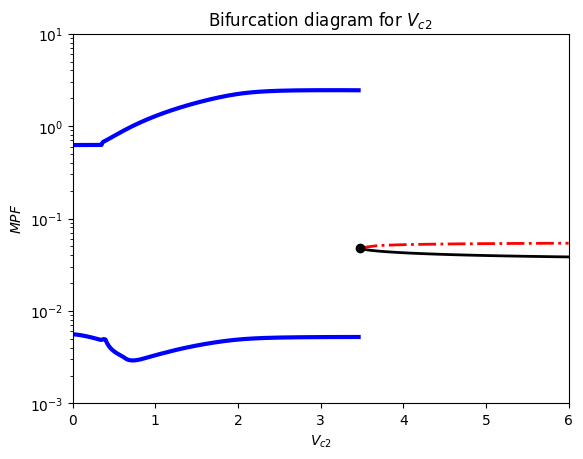

In [21]:
PlotBifurcation(curve_stst, (:V_c2, :MPF))
PlotBifurcation(curve_lcycle, (:V_c2, :MPF))
xlim([0, 6])
xlabel(L"V_{c2}")
ylabel(L"MPF")
yscale("log")
ylim([0.001, 10])
title(L"Bifurcation diagram for $V_{c2}$")
show()

The stable steady state observed before corresponds to the stable branch of the the saddle-node bifurcation observed here. The bifurcation values is $V_{c2}^*=3.47168339841$.

In [22]:
curve_stst.special_points["LP"][1][:V_c2]

3.471683398405677